# Bootstrapping free energy on Pru P 3 MD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Processing entropy outputs

In [2]:
entropy_raw = pd.read_csv('../data/energy/entropy', header = None)
entropy_raw.columns = ['raw_name', 'entropy']
entropy_raw['molecule'] = entropy_raw['raw_name'].str.extract('(\w{2,3}_[A,B]_\d{1,3})*')
entropy_raw['instance'] = entropy_raw['raw_name'].str.extract('\w{2,3}_[A,B]_\d{1,3}_(\w*)')
entropy_raw[:10]

,raw_name,entropy,molecule,instance
0,lig_A_0_complex,220.019266,lig_A_0,complex
1,lig_A_0_ligand,163.009033,lig_A_0,ligand
2,lig_A_0_protein,220.017238,lig_A_0,protein
3,lig_A_1_complex,218.498121,lig_A_1,complex
4,lig_A_1_ligand,157.551397,lig_A_1,ligand
5,lig_A_1_protein,219.584462,lig_A_1,protein
6,lig_A_2_complex,218.659461,lig_A_2,complex
7,lig_A_2_ligand,157.596434,lig_A_2,ligand
8,lig_A_2_protein,218.420449,lig_A_2,protein
9,lig_A_3_complex,217.147008,lig_A_3,complex


In [3]:
entropy_pivot = entropy_raw.pivot_table(columns='instance', values='entropy', index='molecule')
entropy_pivot[:10]

instance,complex,ligand,protein
molecule,,,
lig_A_0,220.019266,163.009033,220.017238
lig_A_1,218.498121,157.551397,219.584462
lig_A_2,218.659461,157.596434,218.420449
lig_A_3,217.147008,163.423264,217.367972
lig_A_4,219.414274,161.326750,219.373551
lig_A_5,217.502487,159.572922,217.290954
lig_A_6,220.357023,160.951108,219.689863
lig_A_7,219.491598,161.676249,219.482238
lig_A_8,218.623978,151.970466,219.055760


In [4]:
entropy_pivot['total'] = entropy_pivot['complex'] - (entropy_pivot['ligand'] + entropy_pivot['protein'])
entropy_pivot['temperature'] = 298
jul2kcal=0.000239006
entropy_pivot['total'] = entropy_pivot['total'] * entropy_pivot['temperature'] * jul2kcal
entropy_pivot.reset_index(level=0, inplace=True)

In [5]:
entropy_pivot['mol_id'] = entropy_pivot['molecule'].str.extract('^(\w{3})')
entropy_pivot['orientation'] = entropy_pivot['molecule'].str.extract('^\w{3}_([A,B])_')

C:\Users\Bruno\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


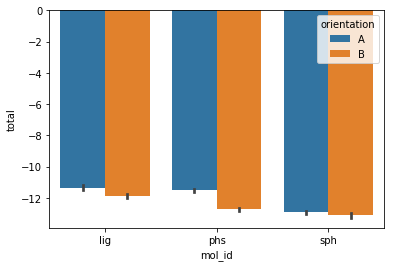

In [6]:
sns.barplot(x = 'mol_id', y ='total', hue='orientation', data = entropy_pivot)
plt.show()

## Processing CaFe outputs

In [7]:
raw_entalpy = pd.read_table('../data/energy/entalpy', sep="\s",header =None, names=['frames', 'dH', 'var', 'raw'])
raw_entalpy['mol_id'] = raw_entalpy['raw'].str.extract('^(\w{3})')
raw_entalpy['orientation'] = raw_entalpy['raw'].str.extract('^\w{3}_([A,B])')
raw_entalpy['rep'] = raw_entalpy['raw'].str.extract('^\w{3}_[A,B]_(\d{1,2})\.entalpy')

C:\Users\Bruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [8]:
raw_entalpy = raw_entalpy[['mol_id', 'orientation', 'rep', 'dH', 'frames', 'var']]

C:\Users\Bruno\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


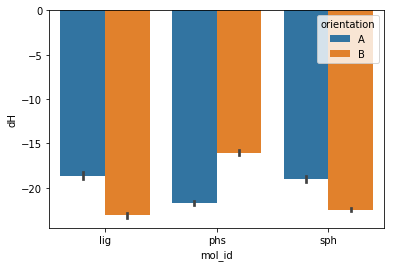

In [9]:
sns.barplot(x = 'mol_id', y = 'dH', hue = 'orientation', data = raw_entalpy)
plt.show()

C:\Users\Bruno\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


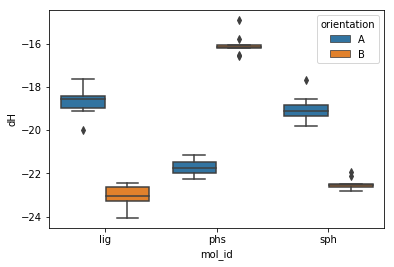

In [10]:
sns.boxplot(x = 'mol_id', y = 'dH', hue = 'orientation', data = raw_entalpy)
plt.show()

## Merging everything

In [11]:
entropy_pivot['rep'] = entropy_pivot['molecule'].str.extract('^\w{3}_[A,B]_(\d*)')
entropy_pivot['dS']  = entropy_pivot['total']
entropy_pivot[:10]

instance,molecule,complex,ligand,protein,total,temperature,mol_id,orientation,rep,dS
0,lig_A_0,220.019266,163.009033,220.017238,-11.609976,298,lig,A,0,-11.609976
1,lig_A_1,218.498121,157.551397,219.584462,-11.298781,298,lig,A,1,-11.298781
2,lig_A_2,218.659461,157.596434,218.420449,-11.207592,298,lig,A,2,-11.207592
3,lig_A_3,217.147008,163.423264,217.367972,-11.655362,298,lig,A,3,-11.655362
4,lig_A_4,219.414274,161.326750,219.373551,-11.487402,298,lig,A,4,-11.487402
5,lig_A_5,217.502487,159.572922,217.290954,-11.350322,298,lig,A,5,-11.350322
6,lig_A_6,220.357023,160.951108,219.689863,-11.416030,298,lig,A,6,-11.416030
7,lig_A_7,219.491598,161.676249,219.482238,-11.514528,298,lig,A,7,-11.514528
8,lig_A_8,218.623978,151.970466,219.055760,-10.854665,298,lig,A,8,-10.854665
9,lig_A_9,218.014006,157.479895,218.006968,-11.215813,298,lig,A,9,-11.215813


In [12]:
final_data = pd.merge(
    raw_entalpy[['mol_id','orientation','rep', 'dH']], 
    entropy_pivot[['mol_id','orientation','rep', 'dS', 'temperature']], 
    how='inner', on=['mol_id','orientation','rep']
)
final_data['dG'] = final_data['dH'] - final_data['dS']

C:\Users\Bruno\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


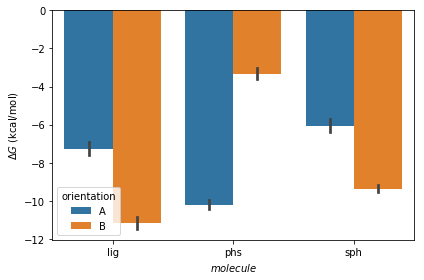

In [13]:
ax = sns.barplot(x = 'mol_id', y ='dG', hue='orientation', data = final_data)
ax.set_ylabel('$\Delta G$ (kcal/mol)')
ax.set_xlabel('$molecule$')
plt.tight_layout()
plt.savefig('../fig/free_binding_energy_bootstrap.png', dpi = 300)
plt.show()

In [14]:
foo = final_data[['mol_id', 'orientation', 'dH','dS','dG']].groupby(['mol_id', 'orientation'])

In [15]:
agg = foo.describe()

In [16]:
agg.to_csv('../data/energy/aggregated_free_energy.csv')

In [23]:
foo.describe(percentiles=[])[['dH']].round(decimals=2)

dH                                  
                   count   mean   std    min    50%    max
mol_id orientation                                        
lig    A            10.0 -18.63  0.68 -19.98 -18.57 -17.64
       B            10.0 -23.03  0.49 -24.07 -23.03 -22.44
phs    A            10.0 -21.73  0.38 -22.27 -21.75 -21.16
       B            10.0 -16.07  0.47 -16.59 -16.17 -14.92
sph    A            10.0 -19.02  0.59 -19.79 -19.09 -17.67
       B            10.0 -22.48  0.27 -22.84 -22.54 -21.94

In [22]:
foo.describe(percentiles=[])[['dS']].round(decimals=2)

dS                                  
                   count   mean   std    min    50%    max
mol_id orientation                                        
lig    A            10.0 -11.36  0.23 -11.66 -11.38 -10.85
       B            10.0 -11.88  0.26 -12.36 -11.92 -11.53
phs    A            10.0 -11.53  0.19 -11.86 -11.57 -11.20
       B            10.0 -12.75  0.18 -13.06 -12.71 -12.57
sph    A            10.0 -12.93  0.20 -13.40 -12.93 -12.65
       B            10.0 -13.12  0.23 -13.58 -13.05 -12.85

In [21]:
foo.describe(percentiles=[])[['dG']].round(decimals=2)

dG                                  
                   count   mean   std    min    50%    max
mol_id orientation                                        
lig    A            10.0  -7.27  0.59  -8.37  -7.27  -6.31
       B            10.0 -11.15  0.58 -12.54 -11.06 -10.48
phs    A            10.0 -10.20  0.41 -10.92 -10.26  -9.57
       B            10.0  -3.33  0.49  -3.84  -3.48  -2.25
sph    A            10.0  -6.09  0.59  -6.93  -6.26  -5.03
       B            10.0  -9.36  0.33  -9.73  -9.43  -8.74

## Analysis of repetitons for ligand A and B

In [43]:
entropy_raw = pd.read_csv('../data/energy/repetitions_entropy', header = None)
entropy_raw.columns = ['raw_name', 'entropy']
entropy_raw['instance'] = entropy_raw['raw_name'].str.extract('\w{2,3}_[A,B]_r\d_\d{1,3}_(\w*)')
entropy_raw['repetition'] = entropy_raw['raw_name'].str.extract('(\w{2,3}_[A,B]_r\d_\d{1,3})_\w*')


In [44]:
entropy_pivot = entropy_raw.pivot_table(columns='instance', values='entropy', index='repetition')
entropy_pivot[:10]

instance,complex,ligand,protein
repetition,,,
lig_A_r1_0,220.019266,163.009033,220.017238
lig_A_r1_1,218.498121,157.551397,219.584462
lig_A_r1_2,218.659461,157.596434,218.420449
lig_A_r1_3,217.147008,163.423264,217.367972
lig_A_r1_4,219.414274,161.326750,219.373551
lig_A_r1_5,217.502487,159.572922,217.290954
lig_A_r1_6,220.357023,160.951108,219.689863
lig_A_r1_7,219.491598,161.676249,219.482238
lig_A_r1_8,218.623978,151.970466,219.055760


In [45]:
entropy_pivot['total'] = entropy_pivot['complex'] - (entropy_pivot['ligand'] + entropy_pivot['protein'])
entropy_pivot['temperature'] = 298
jul2kcal=0.000239006
entropy_pivot['total'] = entropy_pivot['total'] * entropy_pivot['temperature'] * jul2kcal
entropy_pivot.reset_index(level=0, inplace=True)

In [46]:
entropy_pivot['mol_id'] = entropy_pivot['repetition'].str.extract('^(\w{3})')
entropy_pivot['orientation'] = entropy_pivot['repetition'].str.extract('^\w{3}_([A,B])_')
entropy_pivot['repeat'] = entropy_pivot['repetition'].str.extract('^\w{3}_[A,B]_r(\d)')
entropy_pivot['rep'] = entropy_pivot['repetition'].str.extract('^\w{3}_[A,B]_r\d_(\d*

C:\Users\Bruno\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


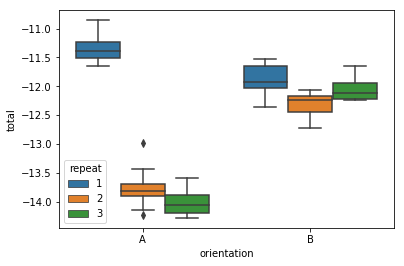

In [47]:
sns.boxplot(x = 'orientation', y ='total', hue='repeat', data = entropy_pivot)
plt.show()

In [58]:
raw_entalpy = pd.read_table('../data/energy/repetitions_entalpy', sep="\s",header =None, names=['frames', 'dH', 'var', 'raw'])
raw_entalpy['mol_id'] = raw_entalpy['raw'].str.extract('^(\w{3})')
raw_entalpy['orientation'] = raw_entalpy['raw'].str.extract('^\w{3}_([A,B])')
raw_entalpy['repeat'] = raw_entalpy['raw'].str.extract('^\w{3}_[A,B]_r(\d)')
raw_entalpy['rep'] = raw_entalpy['raw'].str.extract('^\w{3}_[A,B]_r\d_(\d{1,2})\.entalpy')

C:\Users\Bruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


C:\Users\Bruno\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


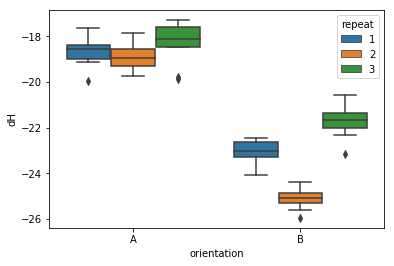

In [59]:
sns.boxplot(x = 'orientation', y = 'dH', hue = 'repeat', data = raw_entalpy)
plt.show()

In [60]:
entropy_pivot['dS'] = entropy_pivot['total']

In [61]:
raw_entalpy[:1]

,frames,dH,var,raw,mol_id,orientation,repeat,rep
0,53,-19.977,5.2533,lig_A_r1_0.entalpy,lig,A,1,0


In [65]:
repeat_ = pd.merge(
    raw_entalpy[['mol_id', 'orientation', 'repeat', 'rep', 'dH']],
    entropy_pivot[['mol_id', 'orientation', 'repeat', 'rep', 'dS']]
)


In [67]:
repeat_['dG'] = repeat_['dH']- repeat_['dS']

C:\Users\Bruno\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


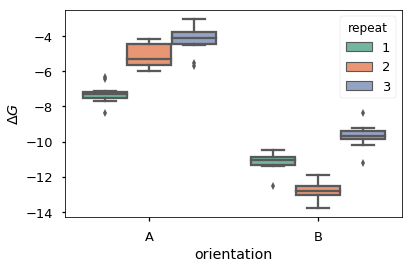

In [81]:
sns.set_context('talk')
sns.set_palette('Set2')
g = sns.boxplot(x = 'orientation', y = 'dG', hue = 'repeat', data = repeat_)
g.set_ylabel('$\Delta G$')
plt.tight_layout()
plt.savefig('C:/Users/Bruno/ownCloud/publication/ltp_2019/figure_n3.png', dpi=300)
plt.show()

In [78]:
repeat_.groupby(['mol_id', 'orientation', 'repeat']).mean().round(2)

dH     dS     dG
mol_id orientation repeat                     
lig    A           1      -18.63 -11.36  -7.27
                   2      -18.89 -13.76  -5.12
                   3      -18.29 -14.01  -4.28
       B           1      -23.03 -11.88 -11.15
                   2      -25.12 -12.31 -12.81
                   3      -21.73 -12.04  -9.69

In [79]:
repeat_.groupby(['mol_id', 'orientation', 'repeat']).std().round(2)

dH    dS    dG
mol_id orientation repeat                  
lig    A           1       0.68  0.23  0.59
                   2       0.64  0.35  0.70
                   3       0.90  0.23  0.82
       B           1       0.49  0.26  0.58
                   2       0.44  0.21  0.51
                   3       0.69  0.22  0.73

In [76]:
repeat_.groupby(['mol_id', 'orientation']).mean()

dH         dS         dG
mol_id orientation                                 
lig    A           -18.602033 -13.044907  -5.557126
       B           -23.291793 -12.073989 -11.217804

In [77]:
repeat_.groupby(['mol_id', 'orientation']).std()

dH        dS        dG
mol_id orientation                              
lig    A            0.764224  1.244633  1.451378
       B            1.514968  0.285587  1.423583